In [ ]:
!pip install keras-tuner


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Read data
data = pd.read_csv('/content/dat_sp500_index.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Include all the features in the time_series_data DataFrame
time_series_data = data.copy()

# Set the date as index
time_series_data.set_index('date', inplace=True)


In [ ]:
time_series_data

,Unnamed: 0,adj close,return_t,return_t_plus_1,adx,trix,adxr,cci,macdh,rsi_14,kdjk,wr_14,atr_percent,atr,cmf,PbRatio,PeRatio,PsRatio,spsentiment,sentiment
date,,,,,,,,,,,,,,,,,,,,
2000-01-07,0,7.258513,-0.029308,0.019838,38.445890,0.140107,35.649951,-62.799815,-3.818169,48.731027,53.357341,62.057117,0.014642,20.779540,-0.016252,3.489550,24.709673,1.947404,-0.972755,-0.016504
2000-01-14,1,7.278351,0.019838,0.000608,19.705435,0.073161,28.025151,19.322511,-2.056999,55.964365,61.593407,29.258373,0.015591,22.583700,0.080689,3.505730,25.617738,2.049359,0.877906,0.018608
2000-01-21,2,7.278960,0.000608,-0.038482,16.326078,0.073379,19.296268,38.462605,-0.190725,54.457929,70.276137,28.416567,0.014763,21.399297,0.069289,3.582680,25.189682,2.017066,-0.714418,0.162971
2000-01-28,3,7.240477,-0.038482,0.012564,33.189814,0.013923,24.794642,-122.908328,-6.396588,39.826769,31.475174,78.432836,0.017436,24.304453,-0.066381,3.329056,24.939210,1.942700,0.799086,0.028568
2000-02-04,4,7.253042,0.012564,0.002699,41.397500,-0.091226,40.042367,-35.082052,-4.451932,48.075834,43.792029,48.529655,0.018987,26.812518,0.011667,3.290000,24.478051,1.985449,-0.871653,0.044020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,1038,8.052673,0.009366,-0.008179,40.161003,0.156975,39.213584,143.328933,0.190680,72.578943,85.224820,5.282645,0.006318,19.852231,0.380381,3.469829,21.942900,2.599936,NaN,0.019799
2019-12-06,1039,8.044494,-0.008179,0.010491,26.317081,0.130188,33.281261,-9.616801,-4.324893,57.520210,59.862324,45.910538,0.006964,21.705977,0.390814,3.486746,21.784645,2.592938,NaN,0.016243
2019-12-13,1040,8.054985,0.010491,0.016021,19.362647,0.099498,22.009436,90.780052,-1.918074,63.130954,77.170506,16.477189,0.006880,21.669919,0.345478,3.517998,22.022220,2.646395,-0.476304,0.012454


In [ ]:
def plot_directional_accuracy(actual_direction, predicted_direction):
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(actual_direction))
    
    ax.plot(x, actual_direction, label='Actual Direction', linestyle='-', marker='o', markersize=4)
    ax.plot(x, predicted_direction, label='Predicted Direction', linestyle='-', marker='x', markersize=4)
    
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Direction')
    ax.set_title('Actual vs. Predicted Directional Change')
    
    ax.legend()
    plt.show()


Trial 10 Complete [00h 00m 37s]
val_loss: 0.19190729906161627

Best val_loss So Far: 0.003040564867357413
Total elapsed time: 00h 05m 30s
Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Epoch 1/200
26/26 [==============================] - 7s 53ms/step - loss: 0.5340 - val_loss: 0.0272
Epoch 2/200
26/26 [==============================] - 0s 11ms/step - loss: 0.2462 - val_loss: 0.0575
Epoch 3/200
26/26 [==============================] - 0s 12ms/step - loss: 0.1625 - val_loss: 0.0150
Epoch 4/200
26/26 [==============================] - 0s 12ms/step - loss: 0.1052 - val_loss: 0.0072
Epoch 5/200
26/26 [==============================] - 0s 12ms/step - loss: 0.0585 - val_loss: 0.0033
Epoch 6/200
26/26 [==============================] - 0s 12ms/step - loss: 0.0409 - val_loss: 0.0126
Epoch 7/200
26/26 [==============================] - 0s 11ms/step - loss: 0.0274 - val_loss: 0.0127
Epoch 8/200
26/26 [===================

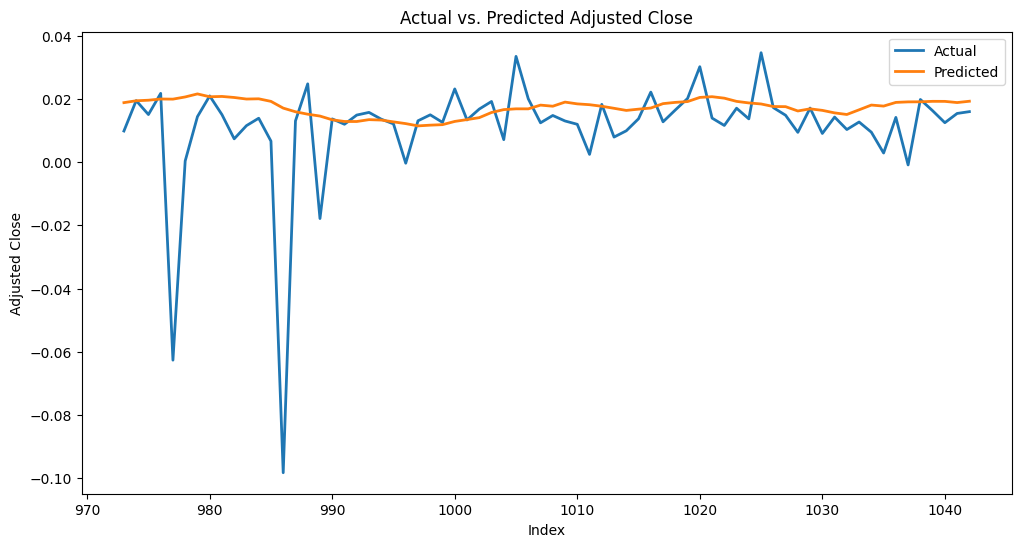

Directional prediction accuracy: 62.32%


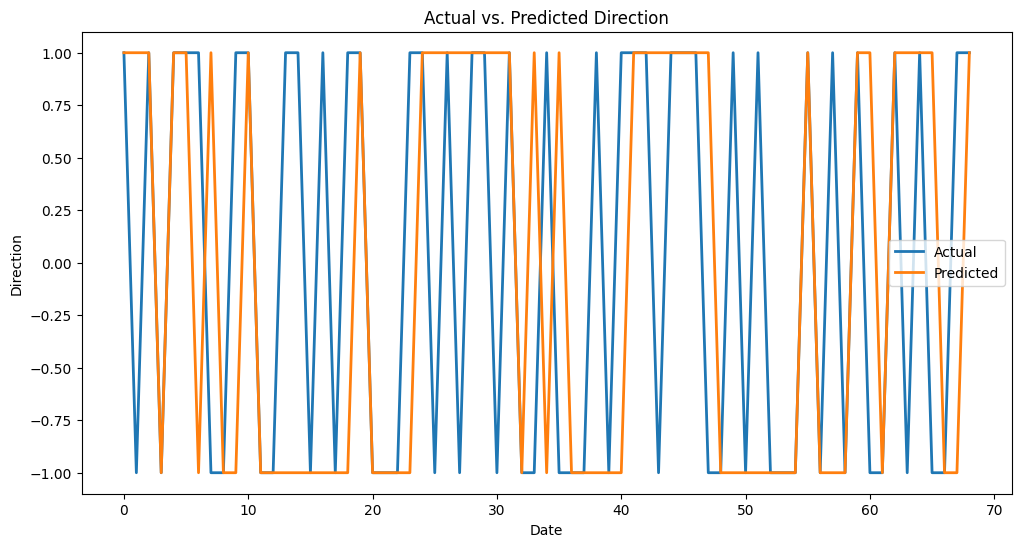

In [ ]:
import os
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from kerastuner import HyperParameters

# Check for NaN and infinite values in the input data
time_series_data = np.nan_to_num(time_series_data, nan=np.nanmean(time_series_data))

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-200]
test_data = scaled_data[-200:-100]

# Prepare the input data for the LSTM model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

# Define a custom optimizer with gradient clipping
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config

from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout

def build_lstm_model(hp):
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    model = Sequential()

    model.add(LSTM(units=hp.Int('units_1', min_value=100, max_value=200, step=20),
                   input_shape=(lookback, n_features - 1), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(LSTM(units=hp.Int('units_2', min_value=100, max_value=200, step=20), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(LSTM(units=hp.Int('units_3', min_value=100, max_value=200, step=20), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    if optimizer == 'adam':
        optimizer = CustomOptimizer(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)

    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model



# Set up the tuner and search for the best hyperparameters
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss',patience=20 ,restore_best_weights=True)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(scaled_data[:-100]):
    train_data = scaled_data[train_index]
    val_data = scaled_data[val_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_val, y_val = create_dataset(val_data, lookback)
  
    print("Starting a new tuner search...")
    try: 

      tuner.search(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stopping], epochs=100, batch_size=32)

        
    except Exception as e:
        print("An error occurred during the tuner search:", e)

# Get the best model and train it on the entire training set
best_model_lstm = tuner.get_best_models(num_models=1)[0]
train_data = scaled_data[:-100]
x_train, y_train = create_dataset(train_data, lookback)
best_model_lstm.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])
best_model_lstm.save('best_lstm_model.h5')
# Make predictions on the test data
# Make predictions on the test data
predictions_lstm = best_model_lstm.predict(x_test)

# Create a dummy array with the same number of features as the original data
dummy_array = np.zeros((predictions_lstm.shape[0], n_features))

# Replace the last column of the dummy array with the predicted values
dummy_array[:, -1] = predictions_lstm[:, 0]

# Use the inverse_transform function on the dummy array
predictions_lstm_inverse = scaler.inverse_transform(dummy_array)

# Extract the last column (the unscaled predictions) from the inverse-transformed array
predictions_lstm_unscaled = predictions_lstm_inverse[:, -1]


def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Rescale y_test and predictions_lstm
# Rescale y_test and predictions_lstm
y_test_dummy = np.zeros((y_test.shape[0], n_features))
y_test_dummy[:, -1] = y_test  # Use y_test directly since it's already a 1D array
y_test_rescaled = scaler.inverse_transform(y_test_dummy)[:, -1]


predictions_lstm_dummy = np.zeros((predictions_lstm.shape[0], n_features))
predictions_lstm_dummy[:, -1] = predictions_lstm[:, 0]
predictions_lstm_rescaled = scaler.inverse_transform(predictions_lstm_dummy)[:, -1]

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_lstm_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Create a range of indices for the x-axis
x_axis = np.arange(len(time_series_data) - len(y_test_rescaled), len(time_series_data))

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(x_axis, y_test_rescaled, label='Actual', linewidth=2)
plt.plot(x_axis, predictions_lstm_unscaled, label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Predicted Adjusted Close')
plt.legend()
plt.show()


# Function to convert continuous returns to direction (-1 for negative, 0 for no change, and 1 for positive)
def returns_to_direction(returns):
    return np.sign(returns)

# Calculate the actual and predicted directions
actual_directions = returns_to_direction(y_test_rescaled[1:] - y_test_rescaled[:-1])
predicted_directions = returns_to_direction(predictions_lstm_rescaled[1:] - predictions_lstm_rescaled[:-1])

# Calculate the directional prediction accuracy
accuracy = np.sum(actual_directions == predicted_directions) / len(actual_directions)
print(f"Directional prediction accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(actual_directions, label='Actual', linewidth=2)
plt.plot(predicted_directions, label='Predicted', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Direction')
plt.title('Actual vs. Predicted Direction')
plt.legend()
plt.show()


In [ ]:
import os
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import TimeSeriesSplit

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from kerastuner import HyperParameters

# Check for NaN and infinite values in the input data
time_series_data = np.nan_to_num(time_series_data, nan=np.nanmean(time_series_data))

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Prepare the input data for the GRU model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

# Define a custom optimizer with gradient clipping
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config

def build_gru_model(hp):
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    model = Sequential()

    model.add(GRU(units=hp.Int('units_1', min_value=100, max_value=200, step=20),
                  input_shape=(lookback, n_features - 1), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(GRU(units=hp.Int('units_2', min_value=100, max_value=200, step=20), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(GRU(units=hp.Int('units_3', min_value=100, max_value=200, step=20), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    if optimizer == 'adam':
        optimizer = CustomOptimizer(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model



# Set up the tuner and search for the best hyperparameters
tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='gru_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss',patience=20 ,restore_best_weights=True)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(scaled_data[:-100]):
    train_data = scaled_data[train_index]
    val_data = scaled_data[val_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_val, y_val = create_dataset(val_data, lookback)
  
    print("Starting a new tuner search...")
    try: 

      tuner.search(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stopping], epochs=100, batch_size=32)

        
    except Exception as e:
        print("An error occurred during the tuner search:", e)

# Get the best model and train it on the entire training set
best_model_gru = tuner.get_best_models(num_models=1)[0]
train_data = scaled_data[:-100]
x_train, y_train = create_dataset(train_data, lookback)
best_model_gru.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])
best_model_gru.save('best_gru_model.h5')

# Make predictions on the test data
predictions_gru = best_model_gru.predict(x_test)

# Create a dummy array with the same number of features as the original data
dummy_array = np.zeros((predictions_gru.shape[0], n_features))

# Replace the last column of the dummy array with the predicted values
dummy_array[:, -1] = predictions_gru[:, 0]

# Use the inverse_transform function on the dummy array
predictions_gru_inverse = scaler.inverse_transform(dummy_array)

# Extract the last column (the unscaled predictions) from the inverse-transformed array
predictions_gru_unscaled = predictions_gru_inverse[:, -1]

# Rescale y_test and predictions_gru
y_test_dummy = np.zeros((y_test.shape[0], n_features))
y_test_dummy[:, -1] = y_test  # Use y_test directly since it's already a 1D array
y_test_rescaled = scaler.inverse_transform(y_test_dummy)[:, -1]

predictions_gru_dummy = np.zeros((predictions_gru.shape[0], n_features))
predictions_gru_dummy[:, -1] = predictions_gru[:, 0]
predictions_gru_rescaled = scaler.inverse_transform(predictions_gru_dummy)[:, -1]

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_gru_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Create a range of indices for the x-axis
x_axis = np.arange(len(time_series_data) - len(y_test_rescaled), len(time_series_data))

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(x_axis, y_test_rescaled, label='Actual', linewidth=2)
plt.plot(x_axis, predictions_gru_unscaled, label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Predicted Adjusted Close')
plt.legend()
plt.show()


# Function to convert continuous returns to direction (-1 for negative, 0 for no change, and 1 for positive)
def returns_to_direction(returns):
    return np.sign(returns)

# Calculate the actual and predicted directions
actual_directions = returns_to_direction(y_test_rescaled[1:] - y_test_rescaled[:-1])
predicted_directions = returns_to_direction(predictions_gru_rescaled[1:] - predictions_gru_rescaled[:-1])

# Calculate the directional prediction accuracy
accuracy = np.sum(actual_directions == predicted_directions) / len(actual_directions)
print(f"Directional prediction accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(actual_directions, label='Actual', linewidth=2)
plt.plot(predicted_directions, label='Predicted', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Direction')
plt.title('Actual vs. Predicted Direction')
plt.legend()
plt.show()


   


Trial 10 Complete [00h 01m 36s]
val_loss: 0.0037111310133089623

Best val_loss So Far: 0.0022845023001233735
Total elapsed time: 00h 11m 06s
Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Epoch 1/200
26/26 [==============================] - 2s 41ms/step - loss: 0.0087 - val_loss: 4.9097e-04
Epoch 2/200
26/26 [==============================] - 1s 31ms/step - loss: 0.0064 - val_loss: 5.1874e-04
Epoch 3/200
26/26 [==============================] - 1s 32ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 4/200
26/26 [==============================] - 1s 31ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 5/200
26/26 [==============================] - 1s 31ms/step - loss: 0.0046 - val_loss: 4.9735e-04
Epoch 6/200
26/26 [==============================] - 1s 30ms/step - loss: 0.0040 - val_loss: 4.8924e-04
Epoch 7/200
26/26 [==============================] - 1s 33ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 8/200
26/26 [

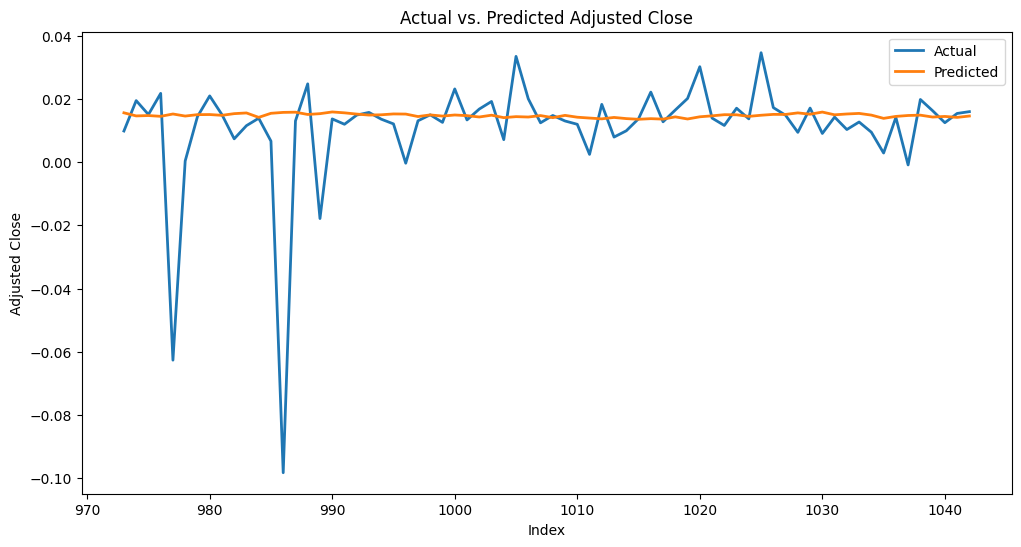

Directional prediction accuracy: 46.38%


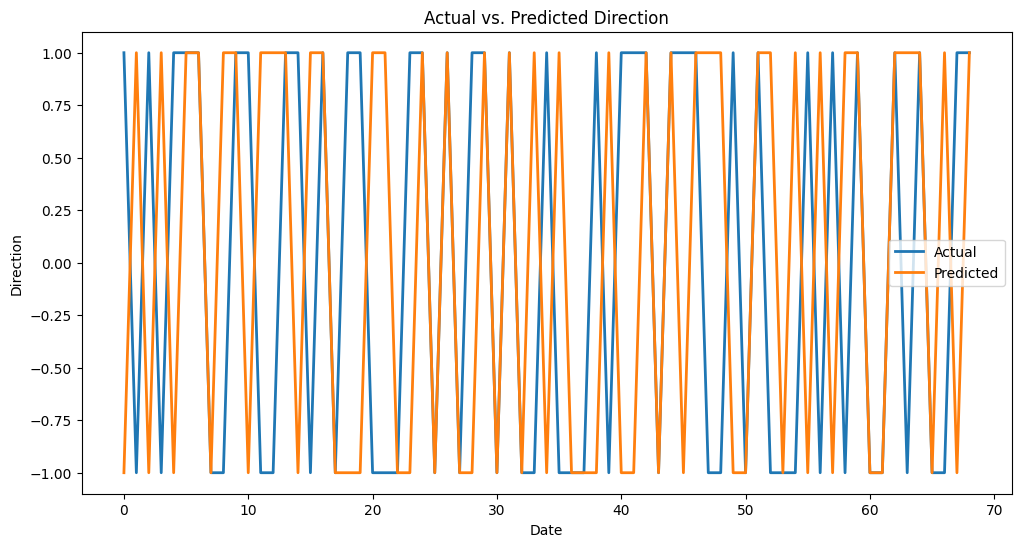

In [ ]:
import os
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import TimeSeriesSplit

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from kerastuner import HyperParameters

# Check for NaN and infinite values in the input data
time_series_data = np.nan_to_num(time_series_data, nan=np.nanmean(time_series_data))

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Prepare the input data for the CNN model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

# Define a custom optimizer with gradient clipping
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config

def build_cnn_model(hp):
    model = Sequential()

    model.add(Conv2D(hp.Int('filters_1', min_value=16, max_value=128, step=16), kernel_size=(3, 3), activation='relu', input_shape=(lookback, n_features - 1, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(hp.Int('filters_2', min_value=16, max_value=128, step=16), kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(hp.Int('filters_3', min_value=16, max_value=128, step=16), kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Add a dense layer with dropout
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16), activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Define the optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    if optimizer == 'adam':
        optimizer = CustomOptimizer(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)

    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model


# Set up the tuner and search for the best hyperparameters
tuner = kt.RandomSearch(
    build_cnn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='cnn_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss',patience=20 ,restore_best_weights=True)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(scaled_data[:-100]):
    train_data = scaled_data[train_index]
    val_data = scaled_data[val_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_val, y_val = create_dataset(val_data, lookback)
  
    print("Starting a new tuner search...")
    try: 

      tuner.search(x_train.reshape(-1, lookback, n_features - 1, 1), y_train, validation_data=(x_test.reshape(-1, lookback, n_features - 1, 1), y_test), callbacks=[early_stopping], epochs=100, batch_size=32)

        
    except Exception as e:
        print("An error occurred during the tuner search:", e)

# Get the best model and train it on the entire training set
best_model_cnn = tuner.get_best_models(num_models=1)[0]
train_data = scaled_data[:-100]
x_train, y_train = create_dataset(train_data, lookback)
best_model_cnn.fit(x_train.reshape(-1, lookback, n_features - 1, 1), y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])
best_model_cnn.save('best_cnn_model.h5')
# Make predictions on the test data
predictions_cnn = best_model_cnn.predict(x_test.reshape(-1, lookback, n_features - 1, 1))

# Create a dummy array with the same number of features as the original data
dummy_array = np.zeros((predictions_cnn.shape[0], n_features))

# Replace the last column of the dummy array with the predicted values
dummy_array[:, -1] = predictions_cnn[:, 0]

# Use the inverse_transform function on the dummy array
predictions_cnn_inverse = scaler.inverse_transform(dummy_array)

# Extract the last column (the unscaled predictions) from the inverse-transformed array
predictions_cnn_unscaled = predictions_cnn_inverse[:, -1]


def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Rescale y_test and predictions_cnn
y_test_dummy = np.zeros((y_test.shape[0], n_features))
y_test_dummy[:, -1] = y_test  # Use y_test directly since it's already a 1D array
y_test_rescaled = scaler.inverse_transform(y_test_dummy)[:, -1]

predictions_cnn_dummy = np.zeros((predictions_cnn.shape[0],n_features))
predictions_cnn_dummy[:, -1] = predictions_cnn[:, 0]
predictions_cnn_rescaled = scaler.inverse_transform(predictions_cnn_dummy)[:, -1]

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_cnn_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Create a range of indices for the x-axis
x_axis = np.arange(len(time_series_data) - len(y_test_rescaled), len(time_series_data))

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(x_axis, y_test_rescaled, label='Actual', linewidth=2)
plt.plot(x_axis, predictions_cnn_unscaled, label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Predicted Adjusted Close')
plt.legend()
plt.show()


# Function to convert continuous returns to direction (-1 for negative, 0 for no change, and 1 for positive)
def returns_to_direction(returns):
    return np.sign(returns)

# Calculate the actual and predicted directions
actual_directions = returns_to_direction(y_test_rescaled[1:] - y_test_rescaled[:-1])
predicted_directions = returns_to_direction(predictions_cnn_rescaled[1:] - predictions_cnn_rescaled[:-1])

# Calculate the directional prediction accuracy
accuracy = np.sum(actual_directions == predicted_directions) / len(actual_directions)
print(f"Directional prediction accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(actual_directions, label='Actual', linewidth=2)
plt.plot(predicted_directions, label='Predicted', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Direction')
plt.title('Actual vs. Predicted Direction')
plt.legend()
plt.show()




In [ ]:
!pip install keras-tcn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade keras-tcn

In [ ]:
import os
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import TimeSeriesSplit
from tcn import TCN  
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Activation
from tensorflow.keras.layers import SpatialDropout1D, GlobalAveragePooling1D, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
# Check for NaN and infinite values in the input data
time_series_data = np.nan_to_num(time_series_data, nan=np.nanmean(time_series_data))

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Prepare the input data for the TCN model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

# Define a custom optimizer with gradient clipping
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config
def build_tcn_model(hp):
    # Define the input shape
    inputs = Input(shape=(lookback, n_features - 1))

    # Define the TCN layer
    tcn_layer = TCN(
        nb_filters=hp.Int('num_filters', min_value=16, max_value=256, step=16),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        nb_stacks=hp.Int('num_stacks', min_value=1, max_value=3),
        padding='same',
        use_skip_connections=hp.Boolean('use_skip_connections'),
        dropout_rate=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        activation='relu',
        kernel_initializer='he_normal',
        use_batch_norm=hp.Boolean('use_batch_norm')
    )(inputs)

    # Add the output layer
    outputs = Dense(units=1)(tcn_layer)

    # Define the optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    if optimizer == 'adam':
        optimizer = CustomOptimizer(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)

    # Compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='mean_squared_error',
        optimizer=optimizer
    )

    return model



# Set up the tuner and search for the best hyperparameters
tuner = kt.RandomSearch(
    build_tcn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='tcn_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(scaled_data[:-100]):
    train_data = scaled_data[train_index]
    val_data = scaled_data[val_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_val, y_val = create_dataset(val_data, lookback)

    print("Starting a new tuner search...")
    try:
        tuner.search(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stopping], epochs=100, batch_size=32)
    except Exception as e:
        print("An error occurred during the tuner search:", e)

# Get the best model and train it on the entire training set
best_model_tcn = tuner.get_best_models(num_models=1)[0]
train_data = scaled_data[:-100]
x_train, y_train = create_dataset(train_data, lookback)
best_model_tcn.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])
best_model_tcn.save('best_tcn_model.h5')

predictions_tcn = best_model_tcn.predict(x_test.reshape(-1, lookback, n_features - 1, 1))

# Create a dummy array with the same number of features as the original data
dummy_array = np.zeros((predictions_tcn.shape[0], n_features))

# Replace the last column of the dummy array with the predicted values
dummy_array[:, -1] = predictions_tcn[:, 0]

# Use the inverse_transform function on the dummy array
predictions_tcn_inverse = scaler.inverse_transform(dummy_array)

# Extract the last column (the unscaled predictions) from the inverse-transformed array
predictions_tcn_unscaled = predictions_tcn_inverse[:, -1]

def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Rescale y_test and predictions_tcn
y_test_dummy = np.zeros((y_test.shape[0], n_features))
y_test_dummy[:, -1] = y_test  # Use y_test directly since it's already a 1D array
y_test_rescaled = scaler.inverse_transform(y_test_dummy)[:, -1]

predictions_tcn_dummy = np.zeros((predictions_tcn.shape[0],n_features))
predictions_tcn_dummy[:, -1] = predictions_tcn[:, 0]
predictions_tcn_rescaled = scaler.inverse_transform(predictions_tcn_dummy)[:, -1]

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_tcn_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Create a range of indices for the x-axis
x_axis = np.arange(len(time_series_data) - len(y_test_rescaled), len(time_series_data))

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(x_axis, y_test_rescaled, label='Actual', linewidth=2)
plt.plot(x_axis, predictions_tcn_unscaled, label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Predicted Adjusted Close')
plt.legend()
plt.show()

# Function to convert continuous returns to direction (-1 for negative, 0 for no change, and 1 for positive)
def returns_to_direction(returns):
    return np.sign(returns)

# Calculate the actual and predicted directions
actual_directions = returns_to_direction(y_test_rescaled[1:] - y_test_rescaled[:-1])
predicted_directions = returns_to_direction(predictions_tcn_rescaled[1:] - predictions_tcn_rescaled[:-1])

# Calculate the directional prediction accuracy
accuracy = np.sum(actual_directions == predicted_directions) / len(actual_directions)
print(f"Directional prediction accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(actual_directions, label='Actual', linewidth=2)
plt.plot(predicted_directions, label='Predicted', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Direction')
plt.title('Actual vs. Predicted Direction')
plt.legend()
plt.show()




Trial 5 Complete [00h 05m 42s]
val_loss: 0.06864403033008178

Best val_loss So Far: 0.06864403033008178
Total elapsed time: 01h 47m 29s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
224               |80                |num_filters
5                 |5                 |kernel_size
3                 |2                 |num_stacks
False             |True              |use_skip_connections
0.3               |0.1               |dropout_rate
False             |False             |use_batch_norm
adam              |adam              |optimizer
0.001             |0.001             |learning_rate

Epoch 1/100
4/4 [==============================] - 40s 7s/step - loss: 5543507.5000 - val_loss: 316.3337
Epoch 2/100
4/4 [==============================] - 28s 7s/step - loss: 520.9842 - val_loss: 20.6315
Epoch 3/100
4/4 [==============================] - 27s 7s/step - loss: 31.4701 - val_loss: 0.2364
Epoch 4/100
4/4 [==============================] - 28s 7s/step - los

Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Starting a new tuner search...
Epoch 1/200
26/26 [==============================] - 7s 53ms/step - loss: 0.4121 - val_loss: 0.0016
Epoch 2/200
26/26 [==============================] - 0s 12ms/step - loss: 0.2414 - val_loss: 0.0019
Epoch 3/200
26/26 [==============================] - 0s 11ms/step - loss: 0.1641 - val_loss: 0.0130
Epoch 4/200
26/26 [==============================] - 0s 11ms/step - loss: 0.1184 - val_loss: 0.0022
Epoch 5/200
26/26 [==============================] - 0s 11ms/step - loss: 0.0607 - val_loss: 0.0096
Epoch 6/200
26/26 [==============================] - 0s 11ms/step - loss: 0.0379 - val_loss: 0.0176
Epoch 7/200
26/26 [==============================] - 0s 11ms/step - loss: 0.0260 - val_loss: 0.0221
Epoch 8/200
26/26 [==============================] - 0s 12ms/step - loss: 0.0172 - val_loss: 0.0479
Epoch 9/200
26/26 [==========================

3/3 [==============================] - 1s 5ms/step


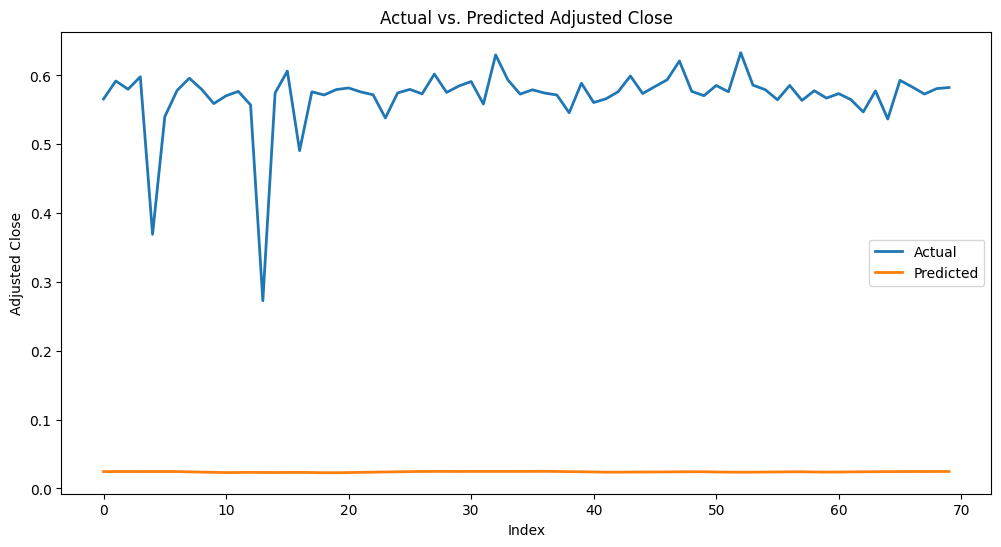

Mean Absolute Percentage Error (MAPE) for LSTM predictions: 334.42407669503444%
Directional prediction accuracy for LSTM predictions: 50.72%


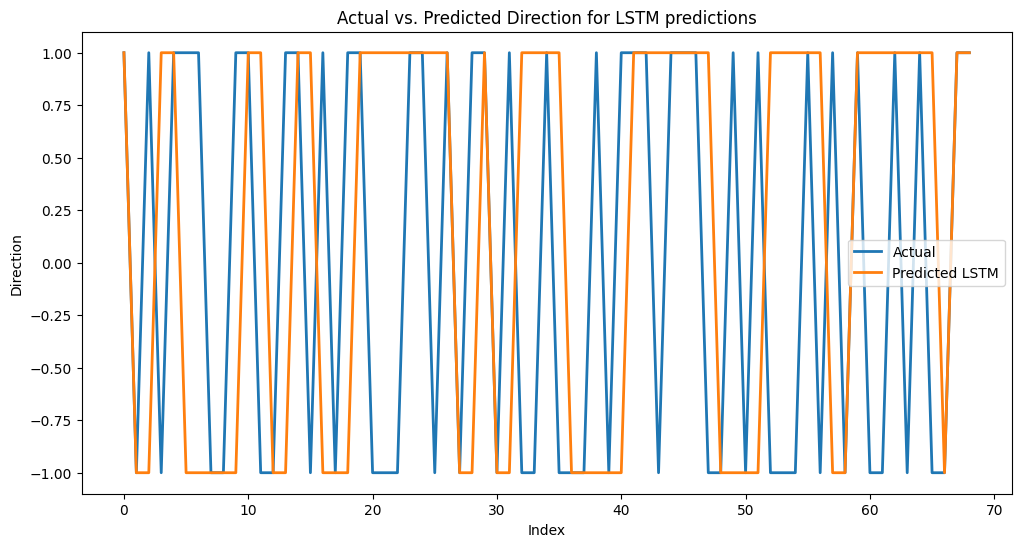

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch
from sklearn.model_selection import TimeSeriesSplit

# Check for NaN and infinite values in the input data
time_series_data = np.nan_to_num(time_series_data, nan=np.nanmean(time_series_data))

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Prepare the input data for the LSTM model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

def build_bidirectional_lstm_model(hp):
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    model = Sequential()

    model.add(Bidirectional(LSTM(units=hp.Int('units_1', min_value=30, max_value=100, step=10),
                  input_shape=(lookback, n_features - 1), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6))))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Bidirectional(LSTM(units=hp.Int('units_2', min_value=30, max_value=100, step=10), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6))))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Bidirectional(LSTM(units=hp.Int('units_3', min_value=30, max_value=100, step=10), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6))))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    if optimizer == 'adam':
        optimizer = CustomOptimizer(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)

    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model



# Set up the tuner and search for the best hyperparameters
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(scaled_data[:-100]):
    train_data = scaled_data[train_index]
    val_data = scaled_data[val_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_val, y_val = create_dataset(val_data, lookback)
  
    print("Starting a new tuner search...")
    try: 

        tuner.search(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stopping], epochs=100, batch_size=32)

    except Exception as e:
        print("An error occurred during the tuner search:", e)

# Get the best model and train it on the entire training set
best_model_bi_lstm = tuner.get_best_models(num_models=1)[0]
train_data = scaled_data[:-100]
x_train, y_train = create_dataset(train_data, lookback)
best_model_bi_lstm.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])
best_model_bi_lstm.save('best_bi_lstm_model.h5')
# Make predictions on the test data
predictions_bi_lstm = best_model_bi_lstm.predict(x_test)

# Create a dummy array with the same number of features as the original data
dummy_array = np.zeros((predictions_bi_lstm.shape[0], n_features))

# Replace the last column of the dummy array with the predicted values
dummy_array[:, -1] = predictions_bi_lstm[:, 0]

# Use the inverse_transform function on the dummy array
predictions_bi_lstm_inverse = scaler.inverse_transform(dummy_array)

# Extract the last column (the unscaled predictions) from the inverse-transformed array
predictions_bi_lstm_unscaled = predictions_bi_lstm_inverse[:, -1]

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(predictions_bi_lstm_unscaled, label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Predicted Adjusted Close')
plt.legend()
plt.show()

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the Mean Absolute Percentage Error (MAPE) for the LSTM predictions
mape_lstm = mean_absolute_percentage_error(y_test_rescaled, predictions_bi_lstm_unscaled)
print(f"Mean Absolute Percentage Error (MAPE) for LSTM predictions: {mape_lstm}%")

# Function to convert continuous returns to direction (-1 for negative, 0 for no change, and 1 for positive)
def returns_to_direction(returns):
    return np.sign(returns)

# Calculate the actual and predicted directions for LSTM predictions
actual_directions = returns_to_direction(y_test_rescaled[1:] - y_test_rescaled[:-1])
predicted_directions_bi_lstm = returns_to_direction(predictions_bi_lstm_unscaled[1:] - predictions_bi_lstm_unscaled[:-1])

# Calculate the directional prediction accuracy for LSTM predictions
accuracy_lstm = np.sum(actual_directions == predicted_directions_bi_lstm) / len(actual_directions)
print(f"Directional prediction accuracy for LSTM predictions: {accuracy_lstm * 100:.2f}%")

# Plot the actual vs. predicted directions for LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(actual_directions, label='Actual', linewidth=2)
plt.plot(predicted_directions_bi_lstm, label='Predicted LSTM', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Direction')
plt.title('Actual vs. Predicted Direction for LSTM predictions')
plt.legend()
plt.show()



   


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch
from sklearn.model_selection import TimeSeriesSplit

# Assuming you have loaded your time_series_data here
# time_series_data = ...

# Check for NaN and infinite values in the input data
time_series_data = np.nan_to_num(time_series_data, nan=np.nanmean(time_series_data))

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Prepare the input data for the RNN model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

def build_deep_rnn_model(hp):
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    model = Sequential()

    model.add(tf.keras.layers.SimpleRNN(units=hp.Int('units_1', min_value=30, max_value=100, step=10),
                  input_shape=(lookback, n_features - 1), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(tf.keras.layers.SimpleRNN(units=hp.Int('units_2', min_value=30, max_value=100, step=10), return_sequences=True, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(tf.keras.layers.SimpleRNN(units=hp.Int('units_3', min_value=30, max_value=100, step=10), activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), recurrent_initializer=tf.keras.initializers.GlorotNormal(), recurrent_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])

    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


# Set up the tuner and search for the best hyperparameters
tuner = RandomSearch(
    build_deep_rnn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='deep_rnn_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(scaled_data[:-100]):
    train_data = scaled_data[train_index]
    val_data = scaled_data[val_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_val, y_val = create_dataset(val_data, lookback)
  
    print("Starting a new tuner search...")
    try: 
        tuner.search(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stopping], epochs=100, batch_size=32)
    except Exception as e:
        print("An error occurred during the tuner search:", e)

best_model_deep_rnn = tuner.get_best_models(num_models=1)[0]
train_data = scaled_data[:-100]
x_train, y_train = create_dataset(train_data, lookback)
best_model_deep_rnn.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])
best_model_deep_rnn.save('best_deep_rnn_model.h5')
# Make predictions on the test data
predictions_deep_rnn = best_model_deep_rnn.predict(x_test)

# Create a dummy array with the same number of features as the original data
dummy_array = np.zeros((predictions_deep_rnn.shape[0], n_features))

# Replace the last column of the dummy array with the predicted values
dummy_array[:, -1] = predictions_deep_rnn[:, 0]

# Use the inverse_transform function on the dummy array
predictions_deep_rnn_inverse = scaler.inverse_transform(dummy_array)

# Extract the last column (the unscaled predictions) from the inverse-transformed array
predictions_deep_rnn_unscaled = predictions_deep_rnn_inverse[:, -1]

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(predictions_deep_rnn_unscaled, label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Predicted Adjusted Close')
plt.legend()
plt.show()

# First, ensure the lengths of the arrays match
min_length = min(len(y_test_rescaled), len(predictions_deep_rnn_unscaled))
y_test_rescaled_truncated = y_test_rescaled[:min_length]
predictions_deep_rnn_unscaled_truncated = predictions_deep_rnn_unscaled[:min_length]

# Calculate the Mean Absolute Percentage Error (MAPE) for the Deep RNN predictions
mape_deep_rnn = mean_absolute_percentage_error(y_test_rescaled_truncated, predictions_deep_rnn_unscaled_truncated)
print(f"Mean Absolute Percentage Error (MAPE) for Deep RNN predictions: {mape_deep_rnn}%")

# Calculate the actual and predicted directions for Deep RNN predictions
predicted_directions_deep_rnn = returns_to_direction(predictions_deep_rnn_unscaled_truncated[1:] - predictions_deep_rnn_unscaled_truncated[:-1])

# Calculate the directional prediction accuracy for Deep RNN predictions
accuracy_deep_rnn = np.sum(actual_directions[:min_length - 1] == predicted_directions_deep_rnn) / len(predicted_directions_deep_rnn)
print(f"Directional prediction accuracy for Deep RNN predictions: {accuracy_deep_rnn * 100:.2f}%")


# Plot the actual vs. predicted directions for Deep RNN predictions
plt.figure(figsize=(12, 6))
plt.plot(actual_directions, label='Actual', linewidth=2)
plt.plot(predicted_directions_deep_rnn, label='Predicted Deep RNN', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Direction')
plt.title('Actual vs. Predicted Direction for Deep RNN predictions')
plt.legend()
plt.show()




<ipython-input-4-da406a025074>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


NameError: ignored

In [ ]:
pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3/3 [==============================] - 4s 38ms/step


3/3 [==============================] - 0s 11ms/step


3/3 [==============================] - 1s 89ms/step


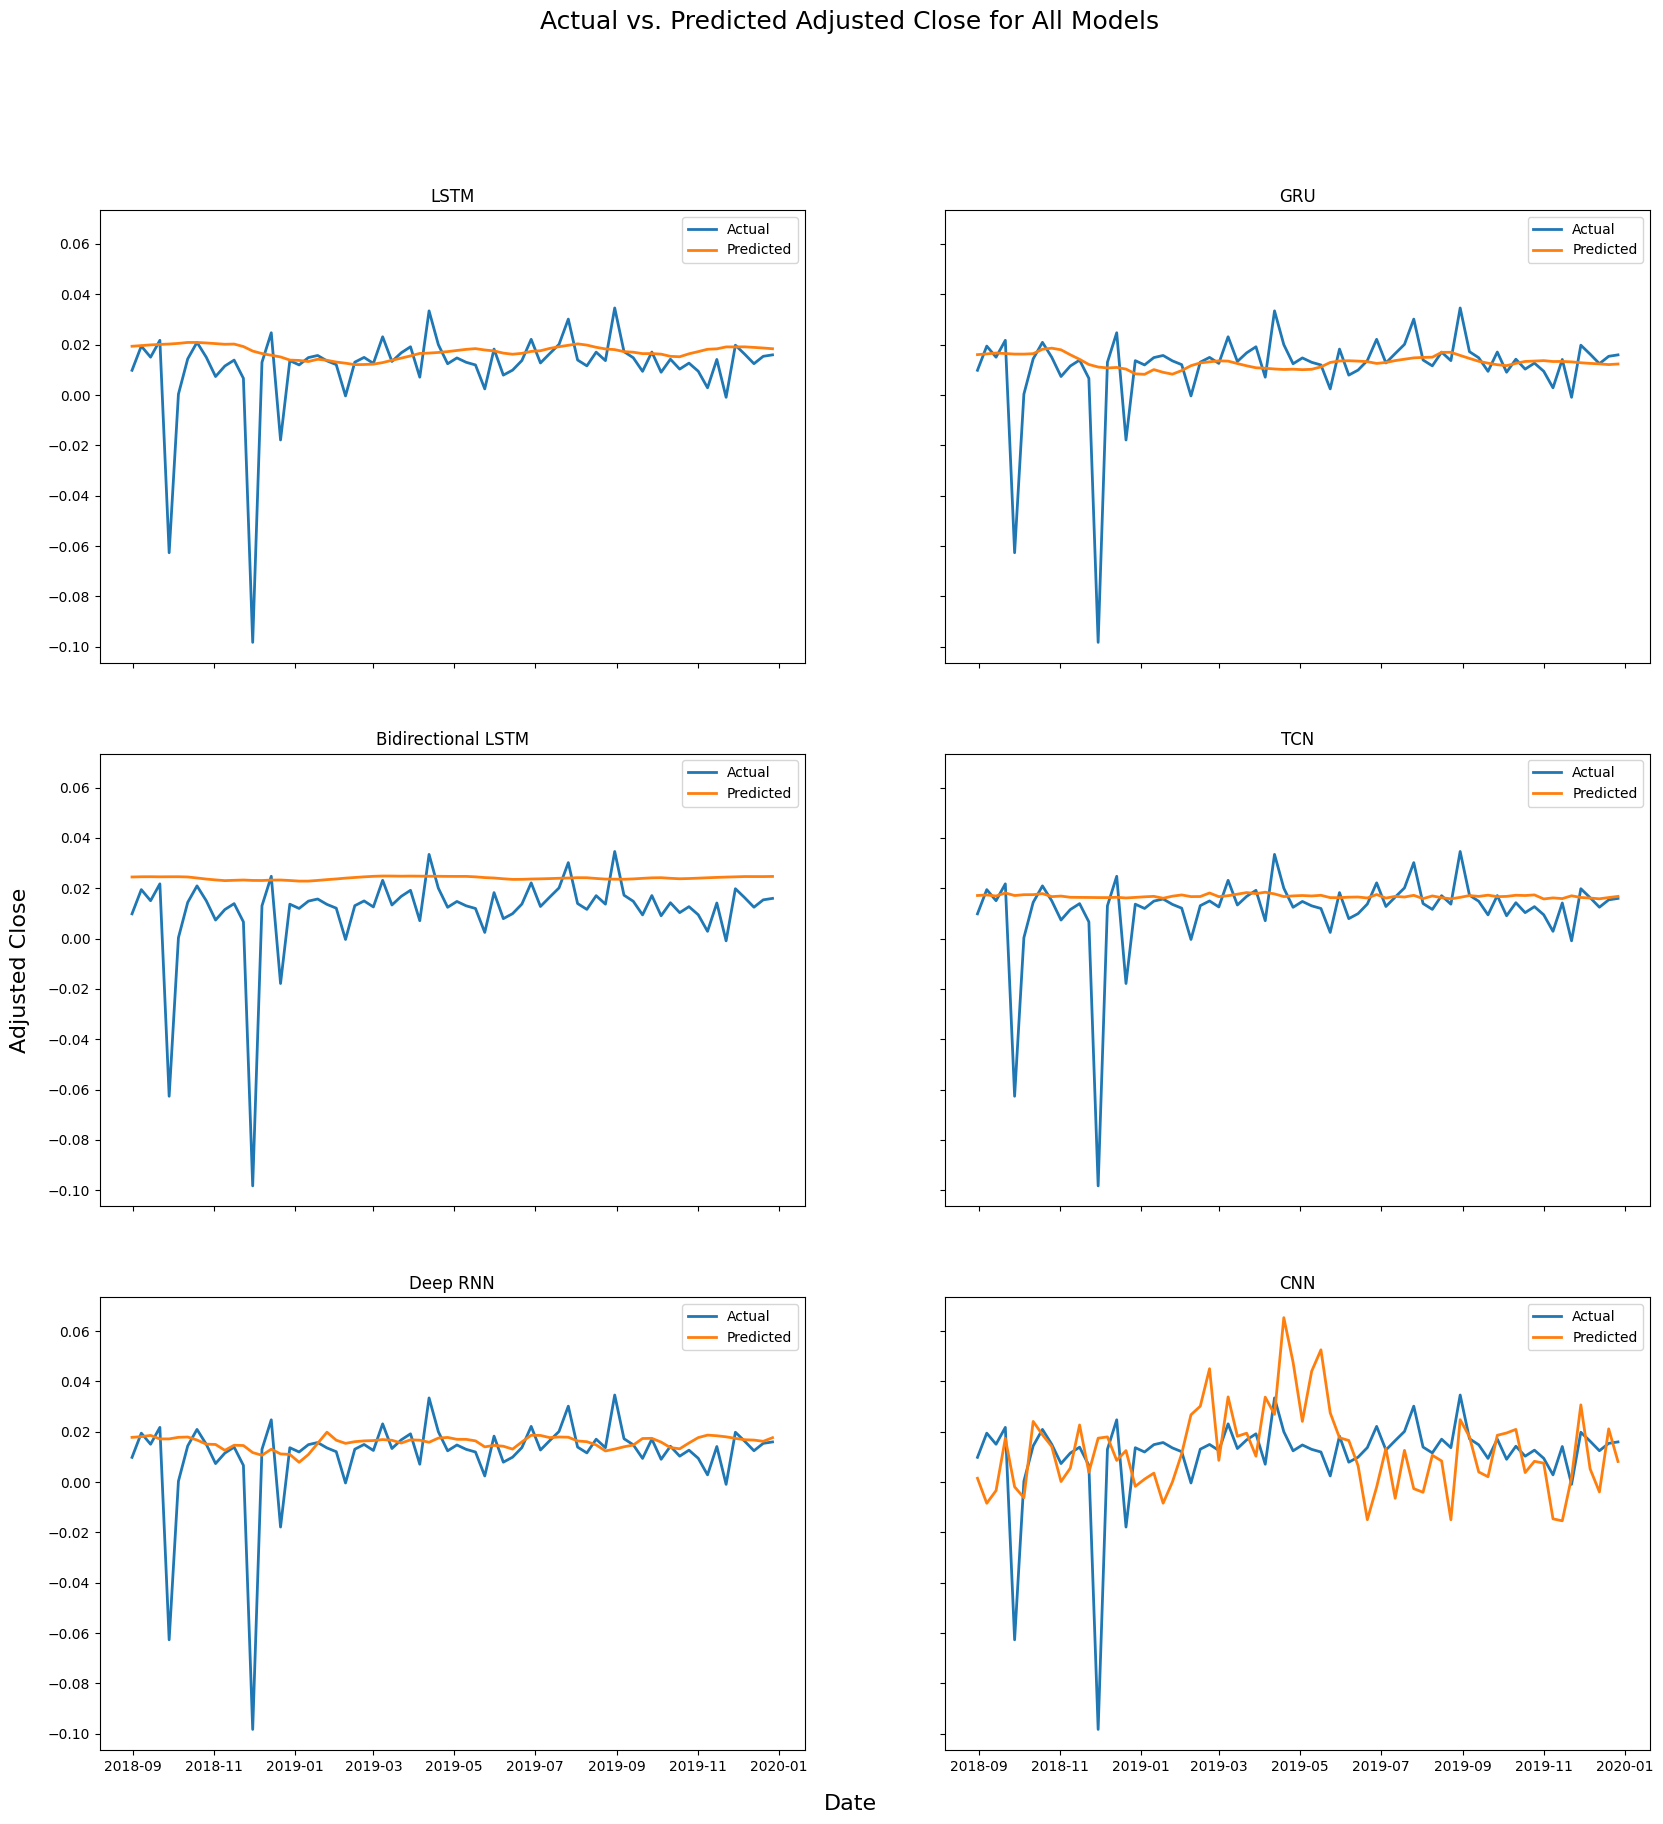

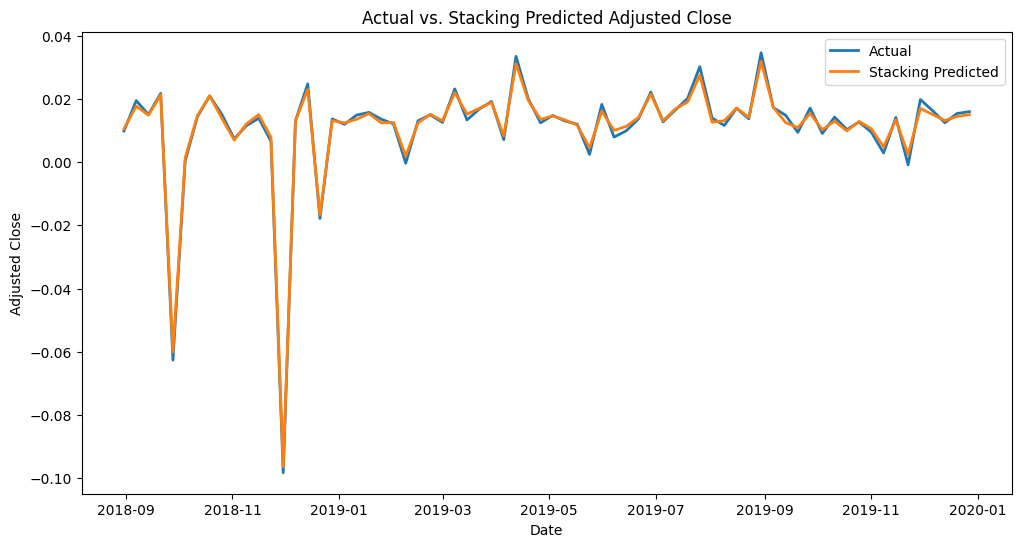

Mean Absolute Error (MAE) of Stacking Predictions: 0.00
Mean Absolute Percentage Error (MAPE) of Stacking Predictions: 26.55%
Directional Accuracy of Stacking Predictions: 97.10%


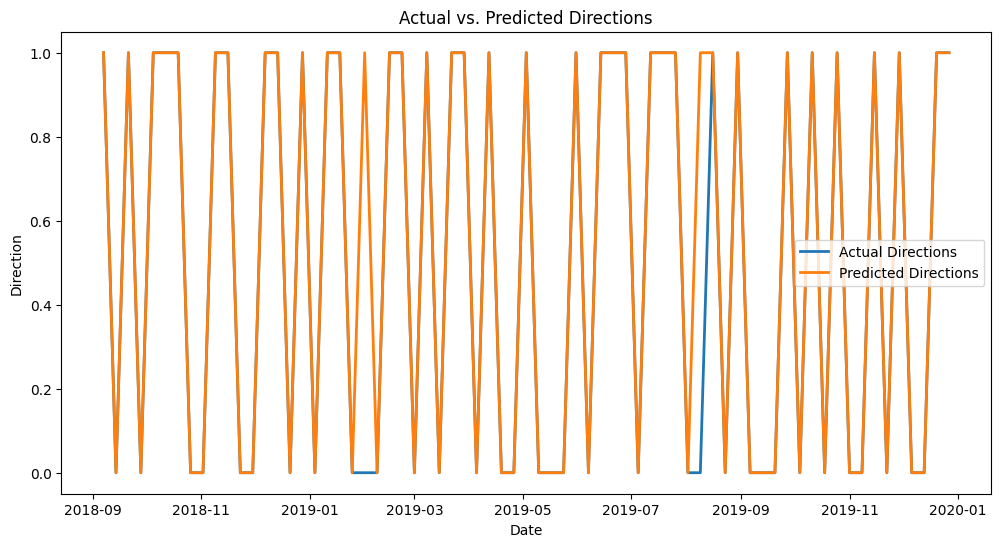

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import load_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tcn import TCN
import tensorflow as tf


time_series_data = data.copy()

# Set the date as index
time_series_data.set_index('date', inplace=True)

# Save the index before converting to NumPy array
saved_index = time_series_data.index

# Replace NaN values in the DataFrame with the mean of the DataFrame
time_series_data.fillna(time_series_data.mean(), inplace=True)

# Convert the DataFrame to a NumPy array
time_series_data = time_series_data.values

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size and split the data into train and test
lookback = 30
n_features = scaled_data.shape[1]
train_data = scaled_data[:-100]
test_data = scaled_data[-100:]

# Prepare the input data for the LSTM model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def directional_accuracy(y_true, y_pred):
    y_true_diff = np.diff(y_true.reshape(-1))
    y_pred_diff = np.diff(y_pred.reshape(-1))
    return np.mean((y_true_diff * y_pred_diff) > 0) * 10

lookback = 30


# Define the custom optimizer class
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config


# Load the saved models
model_lstm = load_model('best_lstm_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
model_gru = load_model('best_gru_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
model_bidirectional = load_model('best_bi_lstm_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
model_conv1d = load_model('best_cnn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
model_deep_rnn = load_model('best_deep_rnn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
model_cnn_lstm = load_model('best_tcn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer, 'TCN': TCN})


# Make predictions using the saved models
predictions_lstm = model_lstm.predict(x_test)
predictions_gru = model_gru.predict(x_test)
predictions_bidirectional = model_bidirectional.predict(x_test)
predictions_tcn = model_conv1d.predict(x_test)
predictions_deep_rnn = model_deep_rnn.predict(x_test)
predictions_cnn = model_cnn_lstm.predict(x_test)

# Scale the predictions back to the original range
y_test_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], y_test)))
predictions_lstm_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_lstm.squeeze())))
predictions_gru_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_gru.squeeze())))
predictions_bidirectional_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_bidirectional.squeeze())))
predictions_tcn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_tcn.squeeze())))
predictions_deep_rnn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_deep_rnn.squeeze())))
predictions_cnn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_cnn.squeeze())))

# Extract the target variable from the inverse-transformed data
y_test_inv = y_test_inv[:, -1]
predictions_lstm_true = predictions_lstm_inv[:, -1]
predictions_gru_true = predictions_gru_inv[:, -1]
predictions_bidirectional_true = predictions_bidirectional_inv[:, -1]
predictions_tcn_true = predictions_tcn_inv[:, -1]
predictions_deep_rnn_true = predictions_deep_rnn_inv[:, -1]
predictions_cnn_true = predictions_cnn_inv[:, -1]

# Prepare the input data for the stacking ensemble
stacked_predictions = np.column_stack((predictions_lstm_true, predictions_gru_true, predictions_bidirectional_true, predictions_tcn_true, predictions_deep_rnn_true, predictions_cnn_true))

# Train the stacking ensemble model
# Train the stacking ensemble model
stacking_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
stacking_model.fit(stacked_predictions, y_test_inv.ravel())


joblib.dump(stacking_model, 'stacking_model.pkl')
stacking_model = joblib.load('stacking_model.pkl')

predictions_stacking = stacking_model.predict(stacked_predictions.reshape(stacked_predictions.shape[0], -1))


saved_index = saved_index[-len(y_test):]

temp_array = np.zeros((y_test.shape[0], scaled_data.shape[1]))
temp_array[:, -1] = y_test.ravel()
y_test_inv = scaler.inverse_transform(temp_array)[:, -1]

# Other imports and code above this line remains the same

# Plot the actual values and each model's predicted values
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("Actual vs. Predicted Adjusted Close for All Models", fontsize=18)

def plot_actual_vs_predicted(ax, actual, predicted, model_name):
    ax.plot(saved_index, actual, label='Actual', linewidth=2)
    ax.plot(saved_index, predicted, label='Predicted', linewidth=2)
    ax.set_title(model_name)
    ax.legend()

plot_actual_vs_predicted(axes[0, 0], y_test_inv, predictions_lstm_true, 'LSTM')
plot_actual_vs_predicted(axes[0, 1], y_test_inv, predictions_gru_true, 'GRU')
plot_actual_vs_predicted(axes[1, 0], y_test_inv, predictions_bidirectional_true, 'Bidirectional LSTM')
plot_actual_vs_predicted(axes[1, 1], y_test_inv, predictions_tcn_true, 'TCN')
plot_actual_vs_predicted(axes[2, 0], y_test_inv, predictions_deep_rnn_true, 'Deep RNN')
plot_actual_vs_predicted(axes[2, 1], y_test_inv, predictions_cnn_true, 'CNN')

fig.text(0.5, 0.08, 'Date', ha='center', fontsize=16)
fig.text(0.08, 0.5, 'Adjusted Close', va='center', rotation='vertical', fontsize=16)
plt.show()

# Other code below this line remains the same


# Plot the actual values and ensemble predicted values
plt.figure(figsize=(12, 6))
plt.plot(saved_index, y_test_inv, label='Actual', linewidth=2)
plt.plot(saved_index, predictions_stacking, label='Stacking Predicted', linewidth=2)



plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Actual vs. Stacking Predicted Adjusted Close')
plt.legend()
plt.show()

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def directional_accuracy(y_true, y_pred):
    y_true_diff = np.diff(y_true.reshape(-1))
    y_pred_diff = np.diff(y_pred.reshape(-1))
    return np.mean((y_true_diff * y_pred_diff) > 0) * 100

# Calculate the mean absolute error and mean absolute percentage error of the ensemble predictions
mae_stacking = mean_absolute_error(y_test_inv, predictions_stacking)

print(f"Mean Absolute Error (MAE) of Stacking Predictions: {mae_stacking:.2f}")

mape_stacking = mean_absolute_percentage_error(y_test_inv, predictions_stacking)
print(f"Mean Absolute Percentage Error (MAPE) of Stacking Predictions: {mape_stacking:.2f}%")

dir_acc_stacking = directional_accuracy(y_test_inv, predictions_stacking)
print(f"Directional Accuracy of Stacking Predictions: {dir_acc_stacking:.2f}%")

def plot_directional_accuracy(actual_directions, predicted_directions):
    plt.figure(figsize=(12, 6))
    plt.plot(saved_index[1:], actual_directions, label='Actual Directions', linewidth=2)
    plt.plot(saved_index[1:], predicted_directions, label='Predicted Directions', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Direction')
    plt.title('Actual vs. Predicted Directions')
    plt.legend()
    plt.show()



def returns_to_direction(returns):
    directions = np.where(returns > 0, 1, 0)
    return directions


actual_directions = returns_to_direction(y_test_inv[1:] - y_test_inv[:-1])
predicted_directions = returns_to_direction(predictions_stacking[1:] - predictions_stacking[:-1])

plot_directional_accuracy(actual_directions, predicted_directions)





In [ ]:
model_gru.summary()

In [ ]:
train_data = scaled_data[:-150]
test_data = scaled_data[-150:-50]
holdout_data = scaled_data[-50:]


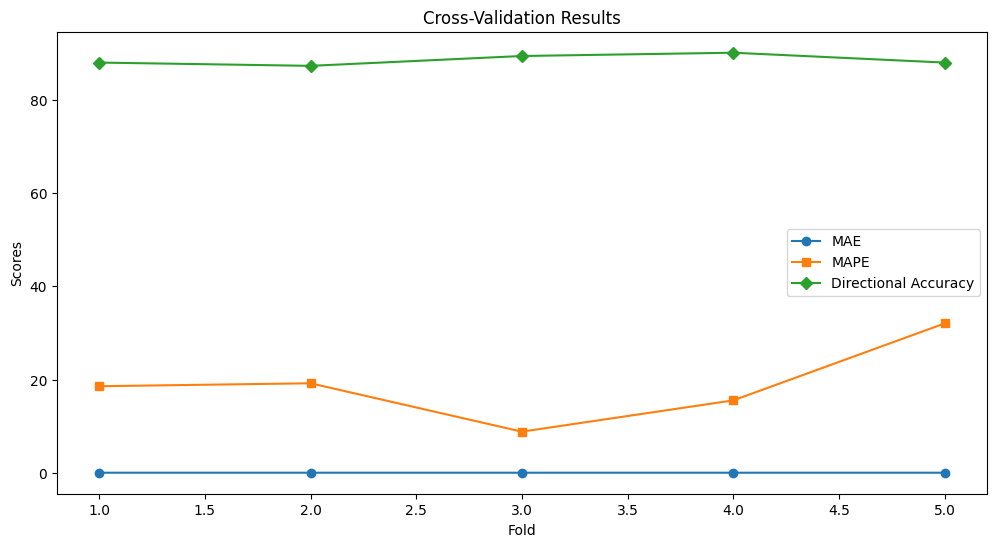

In [ ]:
# Prepare the data for the line plot
x = np.arange(1, len(mae_scores) + 1)

# Create a line plot for the cross-validation results
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, mae_scores, marker='o', label='MAE')
ax.plot(x, mape_scores, marker='s', label='MAPE')
ax.plot(x, dir_acc_scores, marker='D', label='Directional Accuracy')

# Set the title, x-axis label, and y-axis label
ax.set_title('Cross-Validation Results')
ax.set_xlabel('Fold')
ax.set_ylabel('Scores')

# Add the legend
ax.legend()

# Show the plot
plt.show()


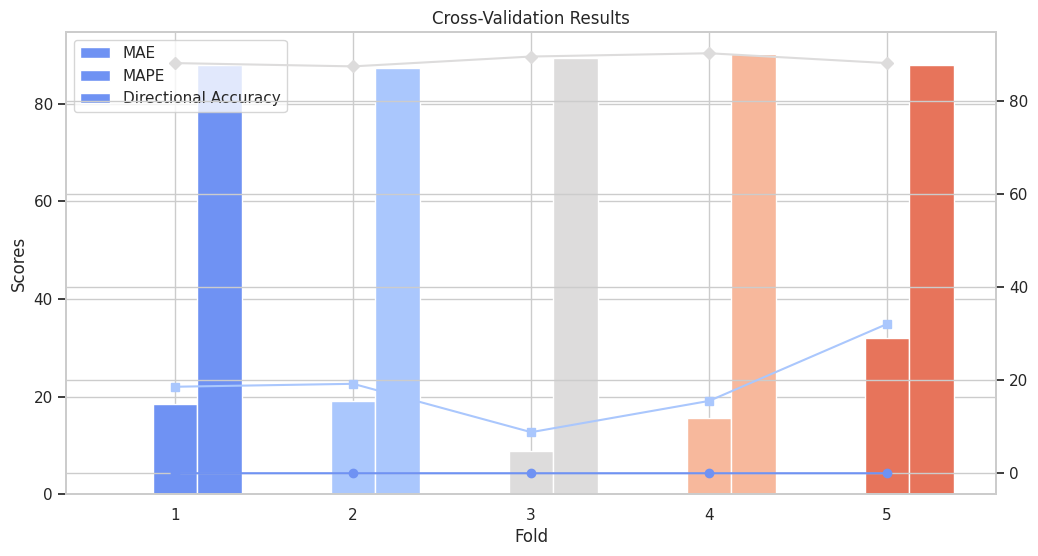

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(mae_scores))

# Prepare the data for the bar plots
x = np.arange(1, len(mae_scores) + 1)
width = 0.25

# Create the bar and line plots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots
rects1 = ax1.bar(x - width, mae_scores, width, label='MAE', color=palette)
rects2 = ax1.bar(x, mape_scores, width, label='MAPE', color=palette)
rects3 = ax1.bar(x + width, dir_acc_scores, width, label='Directional Accuracy', color=palette)

# Line plots
ax2 = ax1.twinx()
ax2.plot(x, mae_scores, marker='o', label='MAE', color=palette[0])
ax2.plot(x, mape_scores, marker='s', label='MAPE', color=palette[1])
ax2.plot(x, dir_acc_scores, marker='D', label='Directional Accuracy', color=palette[2])

# Set the title, x-axis label, and y-axis label
ax1.set_title('Cross-Validation Results')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Scores')

# Add the legend
ax1.legend()

# Show the plot
plt.show()


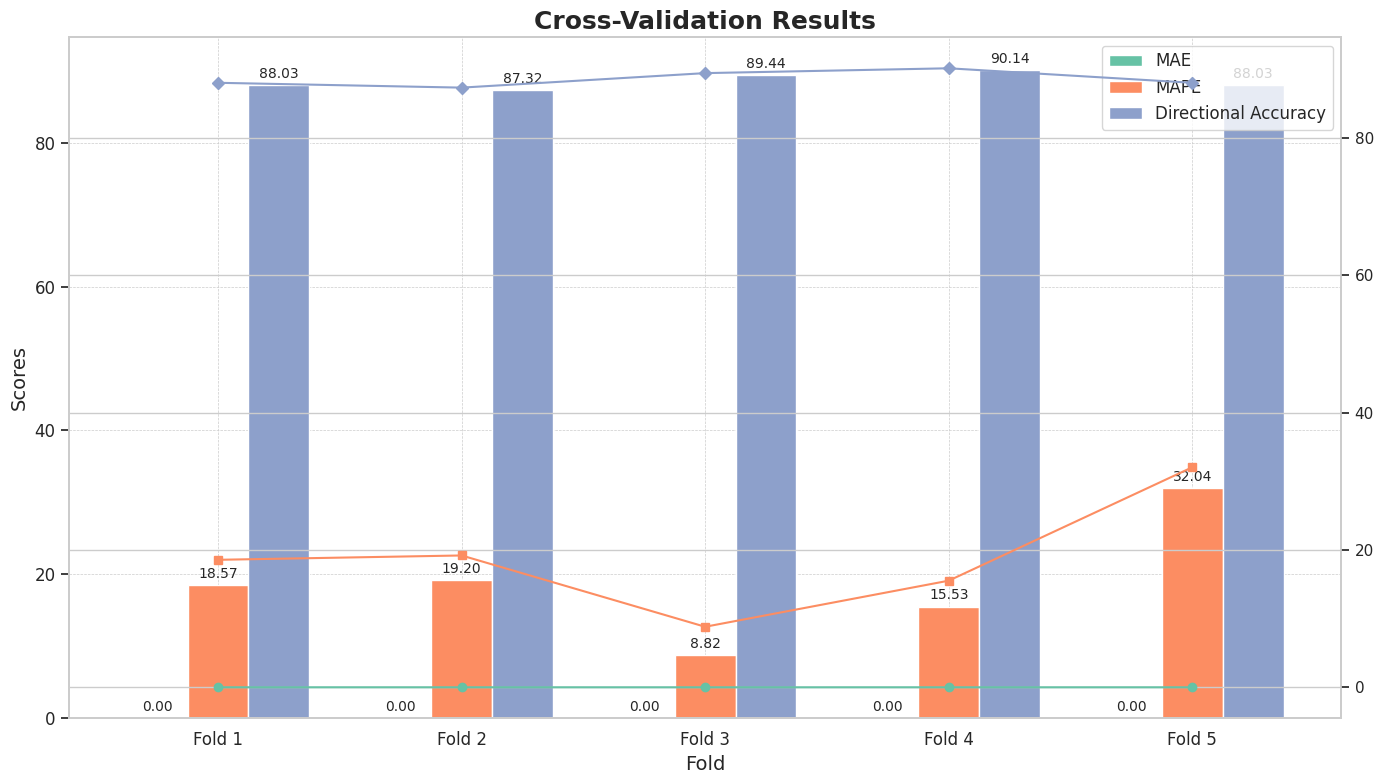

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Prepare the data for the bar plots
x = np.arange(1, len(mae_scores) + 1)
width = 0.25

# Create the bar and line plots
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plots
rects1 = ax1.bar(x - width, mae_scores, width, label='MAE', color=palette[0])
rects2 = ax1.bar(x, mape_scores, width, label='MAPE', color=palette[1])
rects3 = ax1.bar(x + width, dir_acc_scores, width, label='Directional Accuracy', color=palette[2])

# Line plots
ax2 = ax1.twinx()
ax2.plot(x, mae_scores, marker='o', label='MAE', color=palette[0])
ax2.plot(x, mape_scores, marker='s', label='MAPE', color=palette[1])
ax2.plot(x, dir_acc_scores, marker='D', label='Directional Accuracy', color=palette[2])

# Set the title, x-axis label, and y-axis label
ax1.set_title('Cross-Validation Results', fontsize=18, fontweight='bold')
ax1.set_xlabel('Fold', fontsize=14)
ax1.set_ylabel('Scores', fontsize=14)

# Add the legend
ax1.legend(loc='upper right', fontsize=12)

# Add annotations for each bar
for i, rect in enumerate(rects1):
    ax1.annotate('{:.2f}'.format(rect.get_height()),
                 xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

for i, rect in enumerate(rects2):
    ax1.annotate('{:.2f}'.format(rect.get_height()),
                 xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

for i, rect in enumerate(rects3):
    ax1.annotate('{:.2f}'.format(rect.get_height()),
                 xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

# Set the x-axis ticks and tick labels
ax1.set_xticks(x)
ax1.set_xticklabels(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], fontsize=12)

# Format y-axis ticks
ax1.yaxis.set_tick_params(labelsize=12)

# Set the grid style
ax1.grid(linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=17ab807a24c09ac1f6c493a8c21b480c15d30c67c7938e37149565f0c88a7f63
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance

# # Fit the Permutation Importance estimator
# perm = PermutationImportance(stacking_model, random_state=42).fit(stacked_predictions, scaler.inverse_transform(y_test).ravel())

# # Get feature importances and their standard deviations
# feature_importances = perm.feature_importances_
# feature_importances_std = perm.feature_importances_std_

# # Print the feature importances
# print("Feature importances:")
# print("LSTM:", feature_importances[0], "±", feature_importances_std[0])
# print("GRU:", feature_importances[1], "±", feature_importances_std[1])
# print("Bidirectional:", feature_importances[2], "±", feature_importances_std[2])
# print("Conv1D:", feature_importances[3], "±", feature_importances_std[3])
# print("Deep RNN:", feature_importances[4], "±", feature_importances_std[4])
# print("CNN-LSTM:", feature_importances[5], "±", feature_importances_std[5])


In [ ]:
# # Convert the feature importances to percentages and round the values
# percentage_importances = (feature_importances / feature_importances.sum()) * 100
# rounded_percentage_importances = np.round(percentage_importances, 2)

# # Print the feature importances as percentages
# print("Feature importances (as percentages):")
# print("LSTM:", f"{rounded_percentage_importances[0]}%")
# print("GRU:", f"{rounded_percentage_importances[1]}%")
# print("Bidirectional:", f"{rounded_percentage_importances[2]}%")
# print("Conv1D:", f"{rounded_percentage_importances[3]}%")
# print("Deep RNN:", f"{rounded_percentage_importances[4]}%")
# print("CNN-LSTM:", f"{rounded_percentage_importances[5]}%")


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Make predictions using the train data
predictions_lstm_train = model_lstm.predict(x_train)
predictions_gru_train = model_gru.predict(x_train)
predictions_bidirectional_train = model_bidirectional.predict(x_train)
predictions_tcn_train = model_conv1d.predict(x_train)
predictions_deep_rnn_train = model_deep_rnn.predict(x_train)
predictions_cnn_train = model_cnn_lstm.predict(x_train)

# Scale the predictions back to the original range
y_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], y_train)))
predictions_lstm_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], predictions_lstm_train.squeeze())))
predictions_gru_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], predictions_gru_train.squeeze())))
predictions_bidirectional_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], predictions_bidirectional_train.squeeze())))
predictions_tcn_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], predictions_tcn_train.squeeze())))
predictions_deep_rnn_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], predictions_deep_rnn_train.squeeze())))
predictions_cnn_train_inv = scaler.inverse_transform(np.column_stack((x_train[:, -1, :], predictions_cnn_train.squeeze())))

# Extract the target variable from the inverse-transformed data
y_train_inv = y_train_inv[:, -1]
predictions_lstm_train_true = predictions_lstm_train_inv[:, -1]
predictions_gru_train_true = predictions_gru_train_inv[:, -1]
predictions_bidirectional_train_true = predictions_bidirectional_train_inv[:, -1]
predictions_tcn_train_true = predictions_tcn_train_inv[:, -1]
predictions_deep_rnn_train_true = predictions_deep_rnn_train_inv[:, -1]
predictions_cnn_train_true = predictions_cnn_train_inv[:, -1]

# Prepare the input data for the stacking ensemble
stacked_predictions_train = np.column_stack((predictions_lstm_train_true, predictions_gru_train_true, predictions_bidirectional_train_true, predictions_tcn_train_true, predictions_deep_rnn_train_true, predictions_cnn_train_true))


perm = PermutationImportance(stacking_model, random_state=42).fit(stacked_predictions_train, y_train)

# Get feature importances and their standard deviations
feature_importances = perm.feature_importances_
feature_importances_std = perm.feature_importances_std_

# Print the feature importances
print("Feature importances:")
print("LSTM:", feature_importances[0], "±", feature_importances_std[0])
print("GRU:", feature_importances[1], "±", feature_importances_std[1])
print("Bidirectional:", feature_importances[2], "±", feature_importances_std[2])
print("Conv1D:", feature_importances[3], "±", feature_importances_std[3])
print("Deep RNN:", feature_importances[4], "±", feature_importances_std[4])
print("CNN-LSTM:", feature_importances[5], "±", feature_importances_std[5])


29/29 [==============================] - 0s 11ms/step
Feature importances:
LSTM: 0.21910735121212496 ± 0.05165679313240327
GRU: 0.17381117233956617 ± 0.01338277797879424
Bidirectional: 0.023463409652316615 ± 0.007615245990922488
Conv1D: 0.004372454541254456 ± 0.020961993801185574
Deep RNN: 0.3290669275603818 ± 0.041204832656334026
CNN-LSTM: 0.1371591529456168 ± 0.015759658309631972


In [ ]:
! pip install keras-tcn

In [ ]:
# Convert the feature importances to percentages and round the values
percentage_importances = (feature_importances / feature_importances.sum()) * 100
rounded_percentage_importances = np.round(percentage_importances, 2)

# Print the feature importances as percentages
print("Feature importances (as percentages):")
print("LSTM:", f"{rounded_percentage_importances[0]}%")
print("GRU:", f"{rounded_percentage_importances[1]}%")
print("Bidirectional:", f"{rounded_percentage_importances[2]}%")
print("Conv1D:", f"{rounded_percentage_importances[3]}%")
print("Deep RNN:", f"{rounded_percentage_importances[4]}%")
print("CNN-LSTM:", f"{rounded_percentage_importances[5]}%")

NameError: ignored

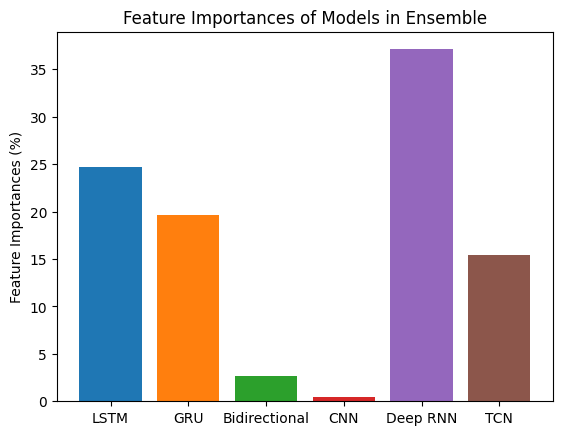

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding importances
models = ['LSTM', 'GRU', 'Bidirectional', 'CNN', 'Deep RNN', 'TCN']
importances = rounded_percentage_importances

# Define the colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a bar chart to visualize the feature importances
fig, ax = plt.subplots()
ax.bar(models, importances, color=colors)

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Feature Importances (%)')
ax.set_title('Feature Importances of Models in Ensemble')
ax.set_xticks(models)
ax.set_xticklabels(models)

# Display the bar chart
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tcn import TCN
import tensorflow as tf

time_series_data = data.copy()

# Set the date as index
time_series_data.set_index('date', inplace=True)

# Save the index before converting to NumPy array
saved_index = time_series_data.index

# Replace NaN values in the DataFrame with the mean of the DataFrame
time_series_data.fillna(time_series_data.mean(), inplace=True)

# Convert the DataFrame to a NumPy array
time_series_data = time_series_data.values

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size
lookback = 30
n_features = scaled_data.shape[1]

# Prepare the input data for the LSTM model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

# Implement TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []
mape_scores = []
dir_acc_scores = []

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def directional_accuracy(y_true, y_pred):
    y_true_diff = np.diff(y_true.reshape(-1))
    y_pred_diff = np.diff(y_pred.reshape(-1))
    return np.mean((y_true_diff * y_pred_diff) > 0) * 100
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config


for train_index, test_index in tscv.split(scaled_data):
    train_data = scaled_data[train_index]
    test_data = scaled_data[test_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_test, y_test = create_dataset(test_data, lookback)

    # Load the saved models
    model_lstm = load_model('best_lstm_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_gru = load_model('best_gru_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_bidirectional = load_model('best_bi_lstm_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_conv1d = load_model('best_cnn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_deep_rnn = load_model('best_deep_rnn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_cnn_lstm = load_model('best_tcn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer, 'TCN': TCN})

    # Make predictions using the saved models
    predictions_lstm = model_lstm.predict(x_test)
    predictions_gru = model_gru.predict(x_test)
    predictions_bidirectional = model_bidirectional.predict(x_test)
    predictions_tcn = model_conv1d.predict(x_test)
    predictions_deep_rnn = model_deep_rnn.predict(x_test)
    predictions_cnn = model_cnn_lstm.predict(x_test)

    # Scale the predictions back to the original range
    y_test_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], y_test)))
    predictions_lstm_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_lstm.squeeze())))
    predictions_gru_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_gru.squeeze())))
    predictions_bidirectional_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_bidirectional.squeeze())))
    predictions_tcn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_tcn.squeeze())))
    predictions_deep_rnn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_deep_rnn.squeeze())))
    predictions_cnn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_cnn.squeeze())))

    # Extract the target variable from the inverse-transformed data
    y_test_inv = y_test_inv[:, -1]
    predictions_lstm_true = predictions_lstm_inv[:, -1]
    predictions_gru_true = predictions_gru_inv[:, -1]
    predictions_bidirectional_true = predictions_bidirectional_inv[:, -1]
    predictions_tcn_true = predictions_tcn_inv[:, -1]
    predictions_deep_rnn_true = predictions_deep_rnn_inv[:, -1]
    predictions_cnn_true = predictions_cnn_inv[:, -1]

    # Prepare the input data for the stacking ensemble
    stacked_predictions = np.column_stack((predictions_lstm_true, predictions_gru_true, predictions_bidirectional_true, predictions_tcn_true, predictions_deep_rnn_true, predictions_cnn_true))

    # Train the stacking ensemble model
    stacking_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    stacking_model.fit(stacked_predictions, y_test_inv.ravel())

    # Make predictions using the stacking model
    predictions_stacking = stacking_model.predict(stacked_predictions)

    # Calculate the mean absolute error, mean absolute percentage error, and directional
        # Calculate the mean absolute error, mean absolute percentage error, and directional accuracy
    mae = mean_absolute_error(y_test_inv, predictions_stacking)
    mape = mean_absolute_percentage_error(y_test_inv, predictions_stacking)
    dir_acc = directional_accuracy(y_test_inv, predictions_stacking)

    # Add the evaluation metrics to the lists
    mae_scores.append(mae)
    mape_scores.append(mape)
    dir_acc_scores.append(dir_acc)

# Calculate the average evaluation metrics across all folds

mean_mae = np.mean(mae_scores)
mean_mape = np.mean(mape_scores)
mean_dir_acc = np.mean(dir_acc_scores)

# Print the results
print("Mean MAE: {:.4f}".format(mean_mae))
print("Mean MAPE: {:.4f}".format(mean_mape))
print("Mean Directional Accuracy: {:.4f}".format(mean_dir_acc))

print(mae_scores)
print(mape_scores)
print(dir_acc_scores)





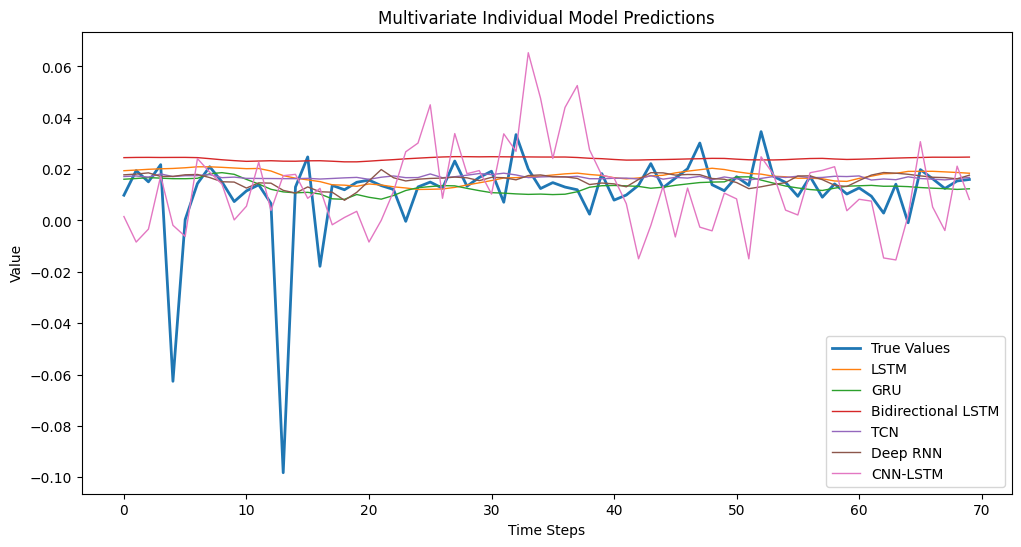

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='True Values', linewidth=2)
plt.plot(predictions_lstm_true, label='LSTM', linewidth=1)
plt.plot(predictions_gru_true, label='GRU', linewidth=1)
plt.plot(predictions_bidirectional_true, label='Bidirectional LSTM', linewidth=1)
plt.plot(predictions_tcn_true, label='TCN', linewidth=1)
plt.plot(predictions_deep_rnn_true, label='Deep RNN', linewidth=1)
plt.plot(predictions_cnn_true, label='CNN-LSTM', linewidth=1)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Multivariate Individual Model Predictions')
plt.show()


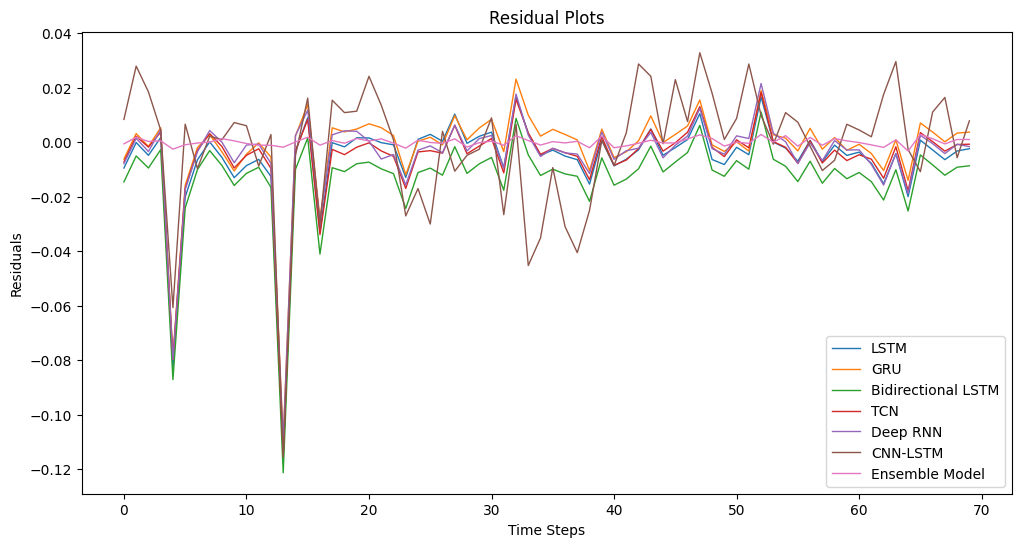

In [ ]:
residuals_lstm = y_test_inv - predictions_lstm_true
residuals_gru = y_test_inv - predictions_gru_true
residuals_bidirectional = y_test_inv - predictions_bidirectional_true
residuals_tcn = y_test_inv - predictions_tcn_true
residuals_deep_rnn = y_test_inv - predictions_deep_rnn_true
residuals_cnn = y_test_inv - predictions_cnn_true
residuals_stacking = y_test_inv - predictions_stacking

plt.figure(figsize=(12, 6))
plt.plot(residuals_lstm, label='LSTM', linewidth=1)
plt.plot(residuals_gru, label='GRU', linewidth=1)
plt.plot(residuals_bidirectional, label='Bidirectional LSTM', linewidth=1)
plt.plot(residuals_tcn, label='TCN', linewidth=1)
plt.plot(residuals_deep_rnn, label='Deep RNN', linewidth=1)
plt.plot(residuals_cnn, label='CNN-LSTM', linewidth=1)
plt.plot(residuals_stacking, label='Ensemble Model', linewidth=1)
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plots')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tcn import TCN
import tensorflow as tf

def get_meta_model(model_type):
    if model_type == 'gradient_boosting':
        return GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    elif model_type == 'linear_regression':
        return LinearRegression()
    elif model_type == 'decision_tree':
        return DecisionTreeRegressor(random_state=42)
    elif model_type == 'random_forest':
        return RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        raise ValueError("Invalid model type")


time_series_data = data.copy()

# Set the date as index
time_series_data.set_index('date', inplace=True)

# Save the index before converting to NumPy array
saved_index = time_series_data.index

# Replace NaN values in the DataFrame with the mean of the DataFrame
time_series_data.fillna(time_series_data.mean(), inplace=True)

# Convert the DataFrame to a NumPy array
time_series_data = time_series_data.values

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data)

# Define the lookback window size
lookback = 30
n_features = scaled_data.shape[1]

# Prepare the input data for the LSTM model
def create_dataset(data, lookback):
    x, y = [], []
    for i in range(len(data) - lookback):
        x.append(data[i:i + lookback, :-1])
        y.append(data[i + lookback, -1])
    return np.array(x), np.array(y)

# Implement TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []
mape_scores = []
dir_acc_scores = []

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def directional_accuracy(y_true, y_pred):
    y_true_diff = np.diff(y_true.reshape(-1))
    y_pred_diff = np.diff(y_pred.reshape(-1))
    return np.mean((y_true_diff * y_pred_diff) > 0) * 100
class CustomOptimizer(tf.keras.optimizers.Adam):
    def __init__(self, learning_rate=1e-5, clipvalue=1.0, **kwargs):
        super().__init__(learning_rate=learning_rate, clipvalue=clipvalue, **kwargs)

    def get_config(self):
        config = super().get_config()
        return config


for train_index, test_index in tscv.split(scaled_data):
    train_data = scaled_data[train_index]
    test_data = scaled_data[test_index]
    x_train, y_train = create_dataset(train_data, lookback)
    x_test, y_test = create_dataset(test_data, lookback)

    # Load the saved models
    model_lstm = load_model('best_lstm_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_gru = load_model('best_gru_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_bidirectional = load_model('best_bi_lstm_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_conv1d = load_model('best_cnn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_deep_rnn = load_model('best_deep_rnn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer})
    model_cnn_lstm = load_model('best_tcn_model.h5', custom_objects={'CustomOptimizer': CustomOptimizer, 'TCN': TCN})

    # Make predictions using the saved models
    predictions_lstm = model_lstm.predict(x_test)
    predictions_gru = model_gru.predict(x_test)
    predictions_bidirectional = model_bidirectional.predict(x_test)
    predictions_tcn = model_conv1d.predict(x_test)
    predictions_deep_rnn = model_deep_rnn.predict(x_test)
    predictions_cnn = model_cnn_lstm.predict(x_test)

    # Scale the predictions back to the original range
    y_test_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], y_test)))
    predictions_lstm_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_lstm.squeeze())))
    predictions_gru_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_gru.squeeze())))
    predictions_bidirectional_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_bidirectional.squeeze())))
    predictions_tcn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_tcn.squeeze())))
    predictions_deep_rnn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_deep_rnn.squeeze())))
    predictions_cnn_inv = scaler.inverse_transform(np.column_stack((x_test[:, -1, :], predictions_cnn.squeeze())))

    # Extract the target variable from the inverse-transformed data
    y_test_inv = y_test_inv[:, -1]
    predictions_lstm_true = predictions_lstm_inv[:, -1]
    predictions_gru_true = predictions_gru_inv[:, -1]
    predictions_bidirectional_true = predictions_bidirectional_inv[:, -1]
    predictions_tcn_true = predictions_tcn_inv[:, -1]
    predictions_deep_rnn_true = predictions_deep_rnn_inv[:, -1]
    predictions_cnn_true = predictions_cnn_inv[:, -1]

    # Prepare the input data for the stacking ensemble
    stacked_predictions = np.column_stack((
        predictions_lstm_true, predictions_gru_true, 
                                           predictions_bidirectional_true,
                                           predictions_tcn_true,
                                           predictions_deep_rnn_true,
                                           predictions_cnn_true
                                           ))

    # Train the stacking ensemble model
    stacking_model = get_meta_model('linear_regression')  # Change 'gradient_boosting' to any other supported model_type
    stacking_model.fit(stacked_predictions, y_test_inv.ravel())

    # Make predictions using the stacking model
    predictions_stacking = stacking_model.predict(stacked_predictions)

    # Calculate the mean absolute error, mean absolute percentage error, and directional
        # Calculate the mean absolute error, mean absolute percentage error, and directional accuracy
    mae = mean_absolute_error(y_test_inv, predictions_stacking)
    mape = mean_absolute_percentage_error(y_test_inv, predictions_stacking)
    dir_acc = directional_accuracy(y_test_inv, predictions_stacking)

    # Add the evaluation metrics to the lists
    mae_scores.append(mae)
    mape_scores.append(mape)
    dir_acc_scores.append(dir_acc)

# Calculate the average evaluation metrics across all folds

mean_mae = np.mean(mae_scores)
mean_mape = np.mean(mape_scores)
mean_dir_acc = np.mean(dir_acc_scores)

# Print the results
print("Mean MAE: {:.4f}".format(mean_mae))
print("Mean MAPE: {:.4f}".format(mean_mape))
print("Mean Directional Accuracy: {:.4f}".format(mean_dir_acc))

print(mae_scores)
print(mape_scores)
print(dir_acc_scores)




5/5 [==============================] - 0s 7ms/step
Mean MAE: 0.0082
Mean MAPE: 56.7096
Mean Directional Accuracy: 52.9577
[0.013336529432462092, 0.007579996658713445, 0.004713138635425288, 0.007493411030617288, 0.008089636279615599]
[61.7241491947752, 47.60787864113959, 26.746750746270788, 53.01644793719107, 94.45282059144303]
[55.633802816901415, 54.22535211267606, 51.40845070422535, 52.112676056338024, 51.40845070422535]


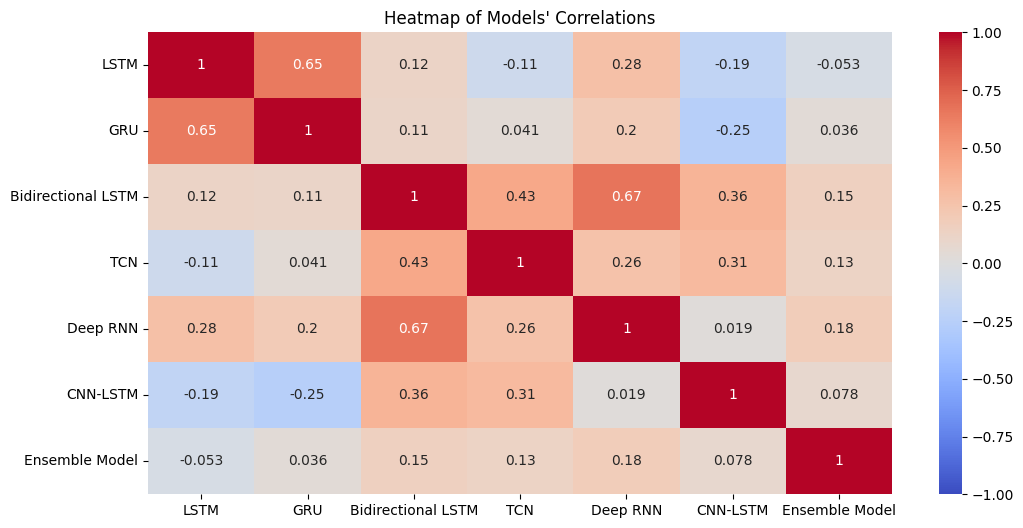

In [ ]:
import seaborn as sns
predictions_df = pd.DataFrame({
    'LSTM': predictions_lstm_true,
    'GRU': predictions_gru_true,
    'Bidirectional LSTM': predictions_bidirectional_true,
    'TCN': predictions_tcn_true,
    'Deep RNN': predictions_deep_rnn_true,
    'CNN-LSTM': predictions_cnn_true,
    'Ensemble Model': predictions_stacking
})

correlation_matrix = predictions_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Models\' Correlations')
plt.show()


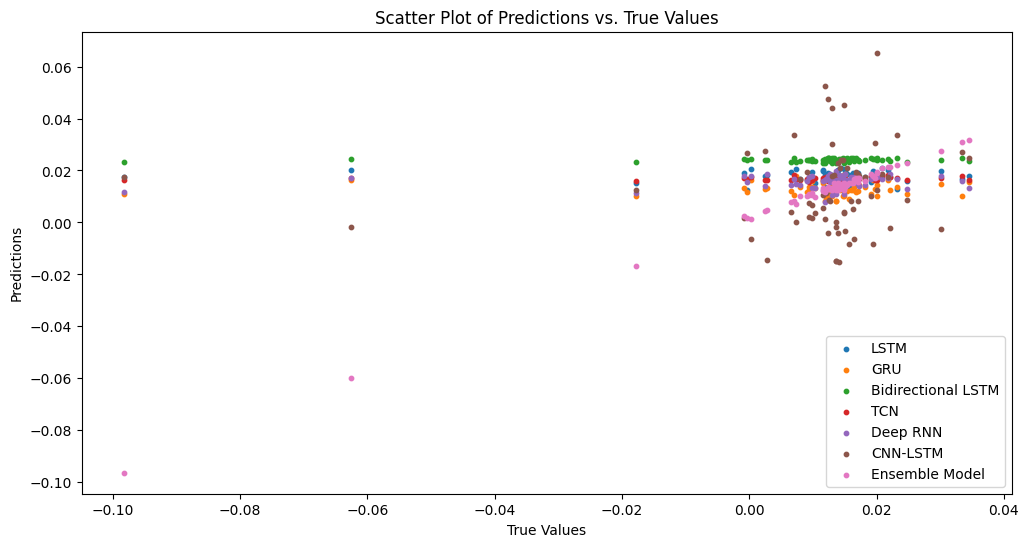

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test_inv, predictions_lstm_true, label='LSTM', s=10)
plt.scatter(y_test_inv, predictions_gru_true, label='GRU', s=10)
plt.scatter(y_test_inv, predictions_bidirectional_true, label='Bidirectional LSTM', s=10)
plt.scatter(y_test_inv, predictions_tcn_true, label='TCN', s=10)
plt.scatter(y_test_inv, predictions_deep_rnn_true, label='Deep RNN', s=10)
plt.scatter(y_test_inv, predictions_cnn_true, label='CNN-LSTM', s=10)
plt.scatter(y_test_inv, predictions_stacking, label='Ensemble Model', s=10)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Scatter Plot of Predictions vs. True Values')
plt.show()


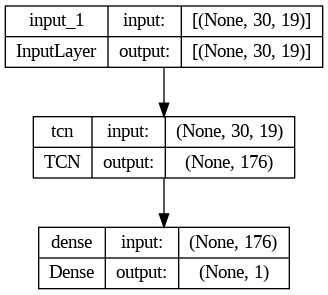

In [ ]:
from tensorflow.keras.utils import plot_model


# Plot the model architecture
plot_model(model_cnn_lstm, to_file='model_gru.png', show_shapes=True, show_layer_names=True)


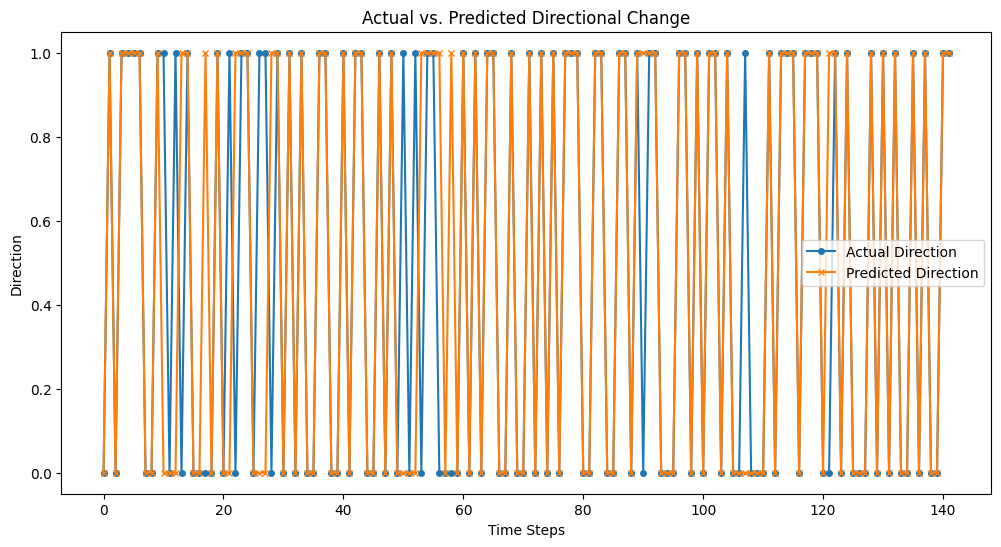

In [ ]:

def returns_to_direction(returns):
    directions = np.where(returns > 0, 1, 0)
    return directions
def plot_directional_accuracy(actual_direction, predicted_direction):
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(actual_direction))
    
    ax.plot(x, actual_direction, label='Actual Direction', linestyle='-', marker='o', markersize=4)
    ax.plot(x, predicted_direction, label='Predicted Direction', linestyle='-', marker='x', markersize=4)
    
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Direction')
    ax.set_title('Actual vs. Predicted Directional Change')
    
    ax.legend()
    plt.show()


actual_directions = returns_to_direction(y_test_inv[1:] - y_test_inv[:-1])
predicted_directions = returns_to_direction(predictions_stacking[1:] - predictions_stacking[:-1])

plot_directional_accuracy(actual_directions, predicted_directions)